In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


In [2]:
# Script definitions
# ------------------

# KMeans sequential - data.1.csv
# KMeans parallel - data.2.csv
# KMeans CUDA - data.3.csv

data_file = '../../lab4/data/data.1.csv'

images_dir = '../images/kmeans_sequential'


In [3]:
if not os.path.exists(images_dir):

	os.system("mkdir -p " + images_dir)

else :

	os.system("rm -r " + images_dir)
	os.system("mkdir -p " + images_dir)


In [4]:
data = pd.read_csv(data_file, sep=',', header=None)

columns = ['image_path', 'clusters', 'image_size', 'iterations', 'overhead', 'read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update', 'kmeans_free', 'kmeans_total', 'kmeans_error', 'kmeans_error_time', 'save', 'free', 'total']
headers = ['Image path', 'Clusters', 'Image size', 'Iterations', 'Overhead', 'Read', 'Standardize', 'KMeans malloc', 'KMeans init', 'KMeans yi2', 'KMeans distance', 'KMeans update', 'KMeans free', 'KMeans total', 'KMeans error', 'KMeans error time', 'Save', 'Free', 'Total']

data.columns = columns

print("Total rows: {0}".format(len(data)))


Total rows: 20


In [5]:
data = data[data['overhead'] < 0.1]

print("Total rows: {0}".format(len(data)))


Total rows: 20


In [6]:
data['image'] = data['image_path'].apply(lambda x: os.path.basename(x).split('.')[0].capitalize())

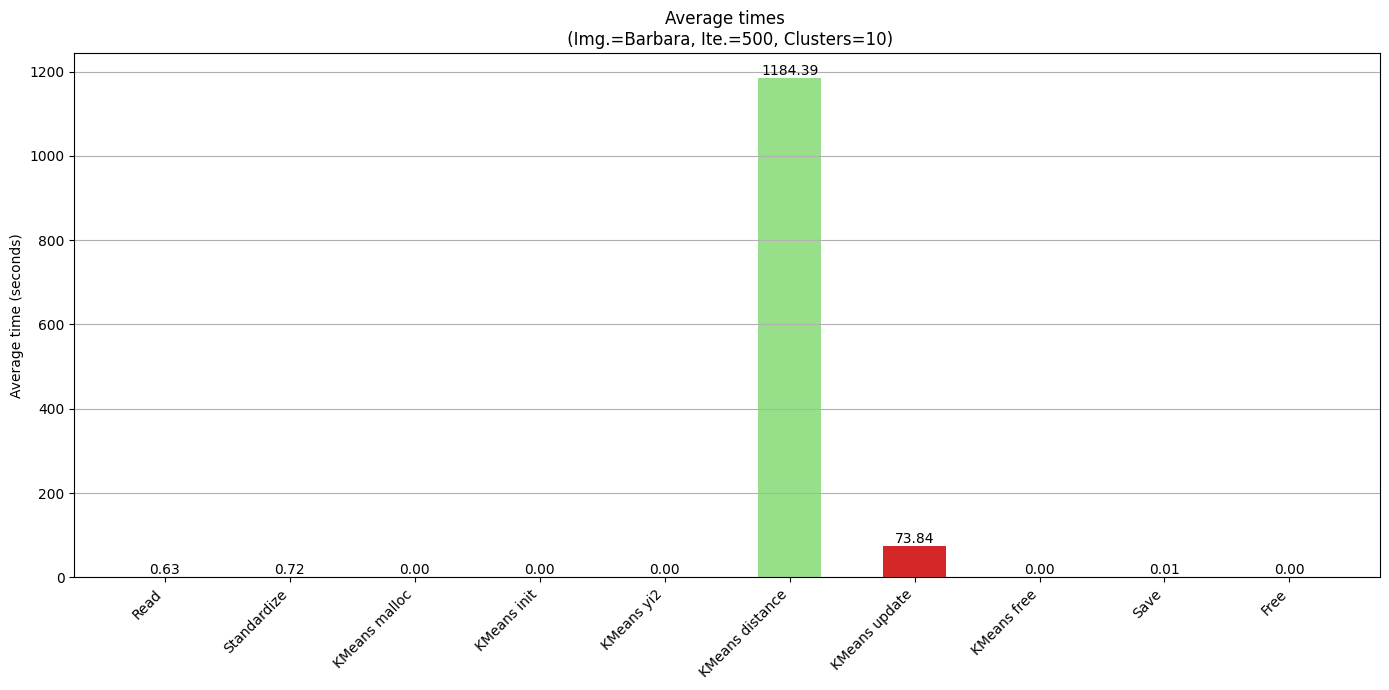

In [7]:
fixed_image = 'Barbara'

filtered_data = data[data['image'] == fixed_image]

time_components = ['read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update', 'kmeans_free', 'save', 'free']
labels = [headers[columns.index(comp)] for comp in time_components]

avg_values = [filtered_data[comp].mean() for comp in time_components]

x = np.arange(len(time_components))
bar_width = 0.5

colors = plt.cm.tab20.colors[:len(time_components)]

fig, ax = plt.subplots(figsize=(14, 7))

bars = ax.bar(x, avg_values, color=colors, width=bar_width)

for bar in bars:

	height = bar.get_height()

	ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average times \n (Img.={fixed_image}, Ite.=500, Clusters=10)')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, f'avg_time_components.{fixed_image.lower()}.png'))
plt.show()


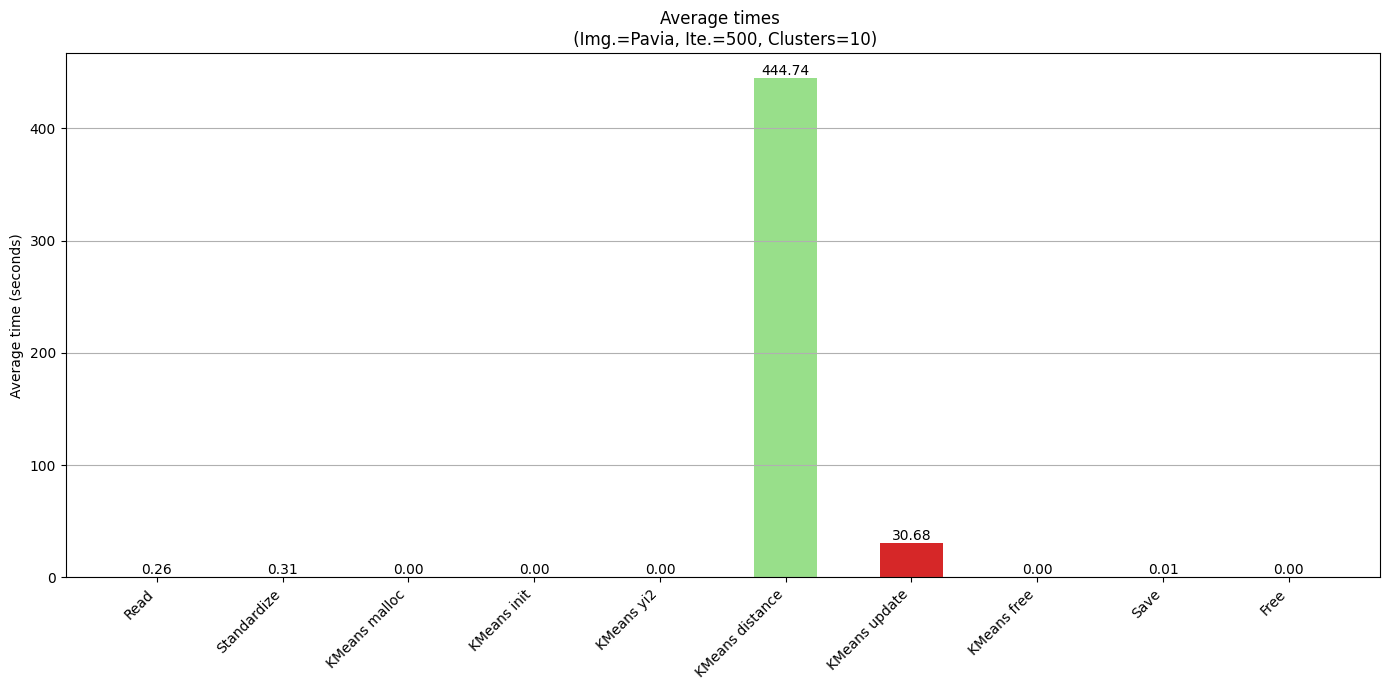

In [8]:
fixed_image = 'Pavia'

filtered_data = data[data['image'] == fixed_image]

time_components = ['read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update', 'kmeans_free', 'save', 'free']
labels = [headers[columns.index(comp)] for comp in time_components]

avg_values = [filtered_data[comp].mean() for comp in time_components]

x = np.arange(len(time_components))
bar_width = 0.5

colors = plt.cm.tab20.colors[:len(time_components)]

fig, ax = plt.subplots(figsize=(14, 7))

bars = ax.bar(x, avg_values, color=colors, width=bar_width)

for bar in bars:

	height = bar.get_height()

	ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average times \n (Img.={fixed_image}, Ite.=500, Clusters=10)')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, f'avg_time_components.{fixed_image.lower()}.png'))
plt.show()


In [9]:
summary_data = []

for image, group in data.groupby('image'):

	# Sequential part
	mean_malloc_time = group['kmeans_malloc'].mean()
	mean_init_time = group['kmeans_init'].mean()
	mean_free_time = group['kmeans_free'].mean()
	mean_yi2_time = group['kmeans_yi2'].mean()
	mean_distance_time = group['kmeans_distance'].mean()
	mean_update_time = group['kmeans_update'].mean()

	mean_total_time = mean_malloc_time + mean_init_time + mean_free_time + mean_yi2_time + mean_distance_time + mean_update_time

	summary_data.append([
		image,
		mean_malloc_time,
		mean_init_time,
		mean_free_time,
		mean_yi2_time,
		mean_distance_time,
		mean_update_time,
		mean_total_time,
	])

summary_df = pd.DataFrame(summary_data, columns=[
	'Image',
	'Mean malloc time',
	'Mean init time',
	'Mean free time',
	'Mean yi2 time',
	'Mean distance time',
	'Mean update time',
	'Mean total time',
])

summary_df = summary_df.round(5)

display(summary_df)

# Save summary DataFrame to LaTeX
# summary_df.to_latex(os.path.join(images_dir, 'summary_df.tex'), index=False, float_format="%.5f")


,Image,Mean malloc time,Mean init time,Mean free time,Mean yi2 time,Mean distance time,Mean update time,Mean total time
0,Barbara,0.00001,0.00001,0.0,0.00150,1184.39230,73.84322,1258.23706
1,Pavia,0.00002,0.00001,0.0,0.00061,444.73683,30.68114,475.41860
